In [8]:
# project uses the caltech101 dataset found here https://data.caltech.edu/records/mzrjq-6wc02

%pip install tensorflow
%pip install keras
%pip install matplotlib
%pip install tensorflow_datasets
%pip install numpy
%pip install seaborn

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Load dataset
train_data, val_data, test_data = tfds.load('caltech101', split=['train[:80%]', 'train[80%:]', 'test'], shuffle_files=True, as_supervised=True)

print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

info = tfds.builder('caltech101').info
class_names = info.features['label'].names
print(f"Total classes: {len(class_names)}")



Training set size: 2448
Validation set size: 612
Test set size: 6084
Image shape: (297, 300, 3)
Label: 10
Total classes: 102


2024-10-30 18:45:06.504911: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


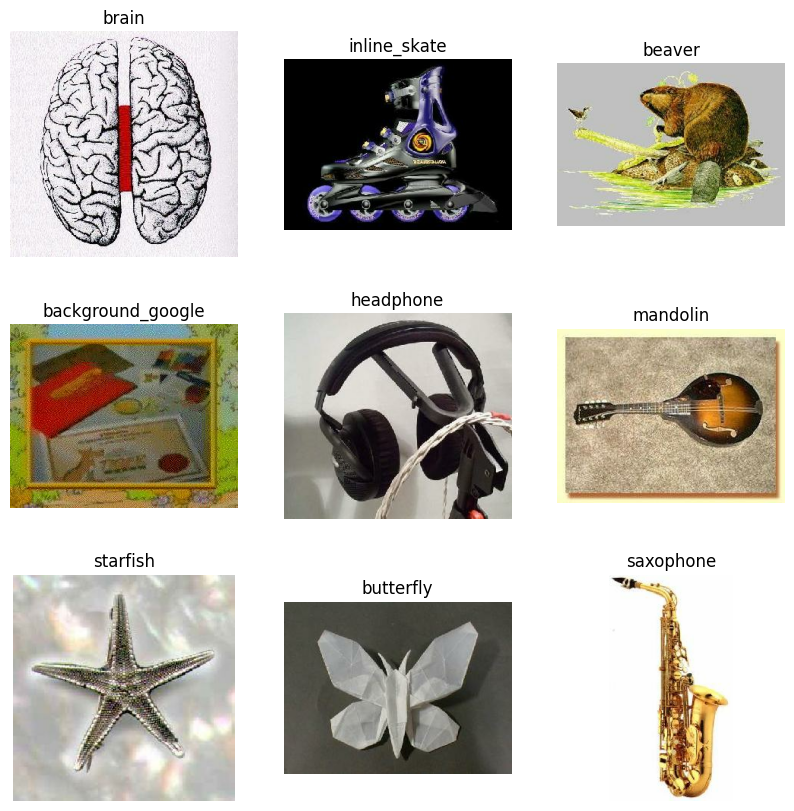

In [10]:
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

In [11]:
# Counting instances per class
import collections
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)


Counter({np.int64(54): 29, np.int64(46): 28, np.int64(16): 28, np.int64(47): 27, np.int64(40): 27, np.int64(52): 27, np.int64(58): 27, np.int64(72): 27, np.int64(98): 27, np.int64(96): 27, np.int64(55): 27, np.int64(29): 27, np.int64(27): 27, np.int64(100): 27, np.int64(21): 27, np.int64(94): 26, np.int64(43): 26, np.int64(15): 26, np.int64(74): 26, np.int64(59): 26, np.int64(30): 26, np.int64(84): 26, np.int64(75): 26, np.int64(20): 26, np.int64(0): 26, np.int64(51): 25, np.int64(7): 25, np.int64(45): 25, np.int64(97): 25, np.int64(36): 25, np.int64(73): 25, np.int64(17): 25, np.int64(44): 25, np.int64(65): 25, np.int64(81): 25, np.int64(31): 25, np.int64(77): 25, np.int64(89): 25, np.int64(83): 25, np.int64(4): 24, np.int64(13): 24, np.int64(70): 24, np.int64(8): 24, np.int64(92): 24, np.int64(23): 24, np.int64(25): 24, np.int64(39): 24, np.int64(50): 24, np.int64(12): 24, np.int64(9): 24, np.int64(28): 24, np.int64(91): 24, np.int64(53): 24, np.int64(3): 24, np.int64(68): 24, np.int

In [12]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: background_google
5: barrel
6: bass
7: beaver
8: binocular
9: bonsai
10: brain
11: brontosaurus
12: buddha
13: butterfly
14: camera
15: cannon
16: car_side
17: ceiling_fan
18: cellphone
19: chair
20: chandelier
21: cougar_body
22: cougar_face
23: crab
24: crayfish
25: crocodile
26: crocodile_head
27: cup
28: dalmatian
29: dollar_bill
30: dolphin
31: dragonfly
32: electric_guitar
33: elephant
34: emu
35: euphonium
36: ewer
37: faces
38: faces_easy
39: ferry
40: flamingo
41: flamingo_head
42: garfield
43: gerenuk
44: gramophone
45: grand_piano
46: hawksbill
47: headphone
48: hedgehog
49: helicopter
50: ibis
51: inline_skate
52: joshua_tree
53: kangaroo
54: ketch
55: lamp
56: laptop
57: leopards
58: llama
59: lobster
60: lotus
61: mandolin
62: mayfly
63: menorah
64: metronome
65: minaret
66: motorbikes
67: nautilus
68: octopus
69: okapi
70: pagoda
71: panda
72: pigeon
73: pizza
74: platypus
75: pyramid
76: revolver
77: rhino
78: r

Training set size after filtering: 2424
Validation set size after filtering: 606
Test set size after filtering: 5647
Image shape: (297, 300, 3)
Label: 10


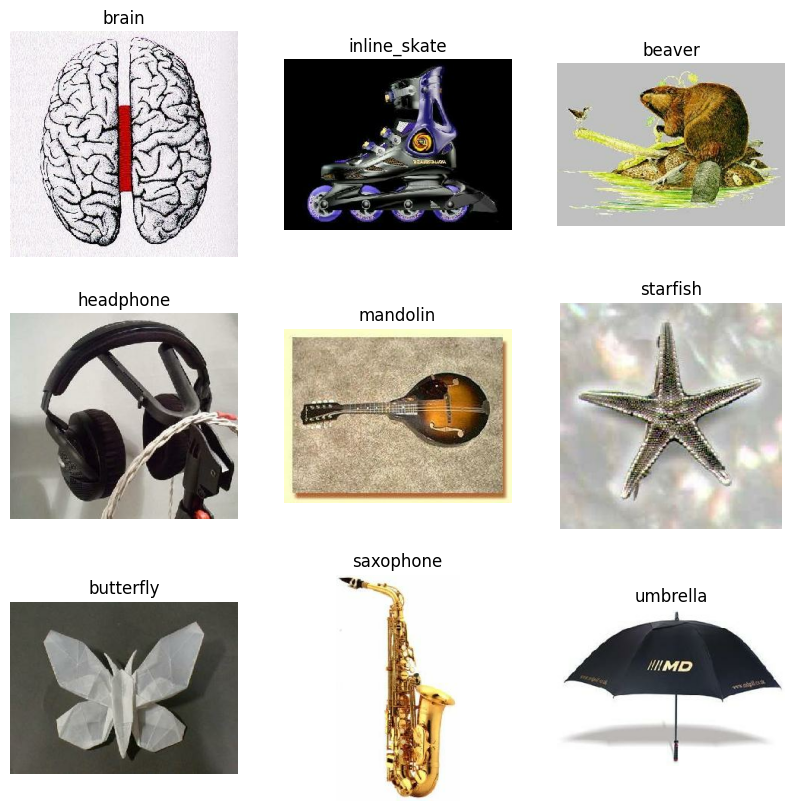

Counter({np.int64(54): 29, np.int64(46): 28, np.int64(16): 28, np.int64(47): 27, np.int64(40): 27, np.int64(52): 27, np.int64(58): 27, np.int64(72): 27, np.int64(98): 27, np.int64(96): 27, np.int64(55): 27, np.int64(29): 27, np.int64(27): 27, np.int64(100): 27, np.int64(21): 27, np.int64(94): 26, np.int64(43): 26, np.int64(15): 26, np.int64(74): 26, np.int64(59): 26, np.int64(30): 26, np.int64(84): 26, np.int64(75): 26, np.int64(20): 26, np.int64(0): 26, np.int64(51): 25, np.int64(7): 25, np.int64(45): 25, np.int64(97): 25, np.int64(36): 25, np.int64(73): 25, np.int64(17): 25, np.int64(44): 25, np.int64(65): 25, np.int64(81): 25, np.int64(31): 25, np.int64(77): 25, np.int64(89): 25, np.int64(83): 25, np.int64(13): 24, np.int64(70): 24, np.int64(8): 24, np.int64(92): 24, np.int64(23): 24, np.int64(25): 24, np.int64(39): 24, np.int64(50): 24, np.int64(12): 24, np.int64(9): 24, np.int64(28): 24, np.int64(91): 24, np.int64(53): 24, np.int64(3): 24, np.int64(68): 24, np.int64(69): 24, np.in

In [13]:
# Get class names and find the index of "google_background"
info = tfds.builder('caltech101').info
class_names = info.features['label'].names
google_background_index = class_names.index("background_google")

# Define a filter function to exclude "google_background"
def filter_google_background(image, label):
    return tf.not_equal(label, google_background_index)

# Apply the filter to each dataset split
train_data = train_data.filter(filter_google_background)
val_data = val_data.filter(filter_google_background)
test_data = test_data.filter(filter_google_background)

# Verifying the dataset sizes after filtering
print(f"Training set size after filtering: {len(list(train_data))}")
print(f"Validation set size after filtering: {len(list(val_data))}")
print(f"Test set size after filtering: {len(list(test_data))}")

# Print the first image and label from the filtered training set
for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

# Visualize a few filtered images
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

# Counting instances per class after filtering
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)

In [14]:
# Resize images
def resize_image(image, label):
    image = tf.image.resize(image, [128, 128])
    return image, label

train_data = train_data.map(resize_image)
val_data = val_data.map(resize_image)
test_data = test_data.map(resize_image)

# Normalize images
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize_image)
val_data = val_data.map(normalize_image)
test_data = test_data.map(normalize_image)

# Edge detection
def edge_detection(image, label):
    # Convert image to grayscale
    image_gray = tf.image.rgb_to_grayscale(image)
    # Add batch dimension to the grayscale image
    image_gray = tf.expand_dims(image_gray, axis=0)
    # Apply Sobel edge detection
    edges = tf.image.sobel_edges(image_gray)
    edge_x = edges[..., 0]
    edge_y = edges[..., 1]
    # Combine the edges
    edges = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))
    # Remove the extra dimension
    edges = tf.squeeze(edges, axis=0)
    edges = tf.clip_by_value(edges, 0.0, 1.0)
    return edges, label

train_data = train_data.map(edge_detection)
val_data = val_data.map(edge_detection)
test_data = test_data.map(edge_detection)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.25),
    tf.keras.layers.RandomContrast(0.25),
    tf.keras.layers.RandomZoom(0.25),
    tf.keras.layers.RandomTranslation(0.25, 0.25)
])

# Function to apply augmentation
def augment_image(image, label):
    image = data_augmentation(image)
    return image, label

# Function to expand training data with augmentation
def expand_training_data(train_data, n_augments):
    augmented_datasets = [train_data]  # Original data

    for _ in range(n_augments):
        augmented_data = train_data.map(augment_image)
        augmented_datasets.append(augmented_data)

    # Concatenate the original and augmented datasets
    full_train_data = augmented_datasets[0]
    for aug_data in augmented_datasets[1:]:
        full_train_data = full_train_data.concatenate(aug_data)

    return full_train_data

# Generate expanded training data
train_data = expand_training_data(train_data, n_augments=1)
train_data_size = len(list(train_data))
train_data = train_data.shuffle(buffer_size=train_data_size)

# Apply batching and prefetching without one-hot encoding
train_data = train_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_data = val_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [15]:
print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

Training set size: 151
Validation set size: 18
Test set size: 176
Image shape: (32, 128, 128, 1)
Label: [ 7 24 29 63 28 45 47 33 24 21 72 66 19 50  8 96 29 28 41  8 21  1 49 21
 34 28 91 92 87 70 10 46]


In [18]:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 187ms/step - accuracy: 0.0163 - loss: 4.6107 - val_accuracy: 0.1003 - val_loss: 3.9909
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 191ms/step - accuracy: 0.1231 - loss: 4.0103 - val_accuracy: 0.2188 - val_loss: 3.4381
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - accuracy: 0.2541 - loss: 3.3931 - val_accuracy: 0.2451 - val_loss: 3.2457
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 30s 182ms/step - accuracy: 0.3710 - loss: 2.8832 - val_accuracy: 0.2566 - val_loss: 3.3610
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 169ms/step - accuracy: 0.4633 - loss: 2.4832 - val_accuracy: 0.2697 - val_loss: 3.7507
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 159ms/step - accuracy: 0.5107 - loss: 2.2606 - val_accuracy: 0.2467 - val_loss: 4.1892
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - accuracy: 0.5202 - loss: 2.1917 - val_accuracy: 0.2434 - val_loss: 4.9326
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 164ms/step - accuracy: 0.5327 - loss: 2

176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step
Accuracy: 42.79%


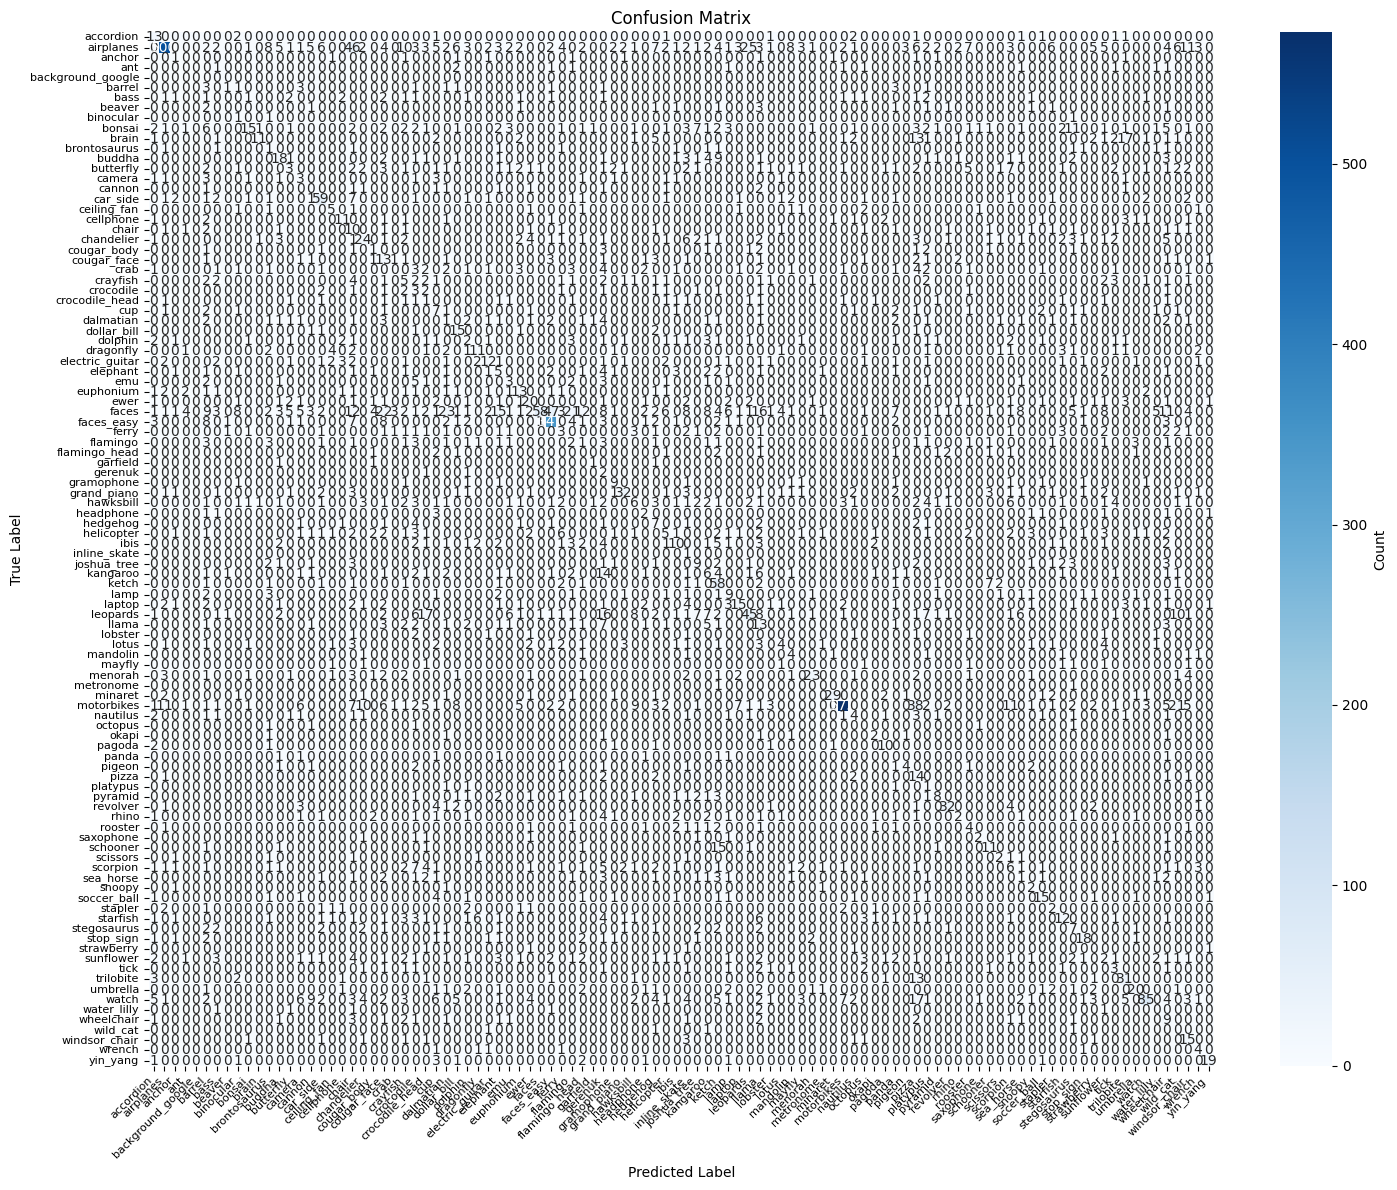

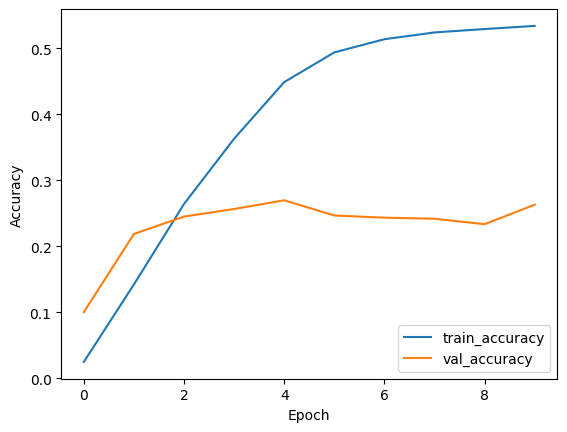

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def print_results():
    # Extract test images and labels from the test dataset
    test_images, test_labels = zip(*[(image, label) for image, label in tfds.as_numpy(test_data)])
    test_images = np.array([image for batch in test_images for image in batch])
    test_labels = np.array([label for batch in test_labels for label in batch])

    # Generate predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Calculate accuracy manually
    accuracy = np.sum(predicted_classes == test_labels) / len(test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Calculate confusion matrix
    num_classes = len(class_names)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(test_labels, predicted_classes):
        confusion_matrix[true, pred] += 1

    # Plot confusion matrix
    plt.figure(figsize=(15, 12))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Count'})
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    # Plot training history
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
print_results()


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 25s 135ms/step - accuracy: 0.0080 - loss: 4.6236

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 25s 139ms/step - accuracy: 0.0080 - loss: 4.6233 - val_accuracy: 0.0132 - val_loss: 4.3428
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 165ms/step - accuracy: 0.0242 - loss: 4.5262 - val_accuracy: 0.0263 - val_loss: 4.1637
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 163ms/step - accuracy: 0.0677 - loss: 4.3009 - val_accuracy: 0.1217 - val_loss: 3.9054
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - accuracy: 0.1292 - loss: 4.0114 - val_accuracy: 0.1809 - val_loss: 3.6721
Epoch 5/10


2024-10-30 18:55:15.550149: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 183ms/step - accuracy: 0.1849 - loss: 3.7881 - val_accuracy: 0.2089 - val_loss: 3.4639
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.2519 - loss: 3.5451 - val_accuracy: 0.2352 - val_loss: 3.3430
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 30s 175ms/step - accuracy: 0.2836 - loss: 3.3634 - val_accuracy: 0.2697 - val_loss: 3.2467
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 187ms/step - accuracy: 0.3335 - loss: 3.1972 - val_accuracy: 0.2599 - val_loss: 3.2337
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 189ms/step - accuracy: 0.3583 - loss: 3.0366 - val_accuracy: 0.2829 - val_loss: 3.2013
Epoch 10/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 188ms/step - accuracy: 0.4142 - loss: 2.8833 - val_accuracy: 0.2780 - val_loss: 3.1785
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step
Accuracy: 45.13%


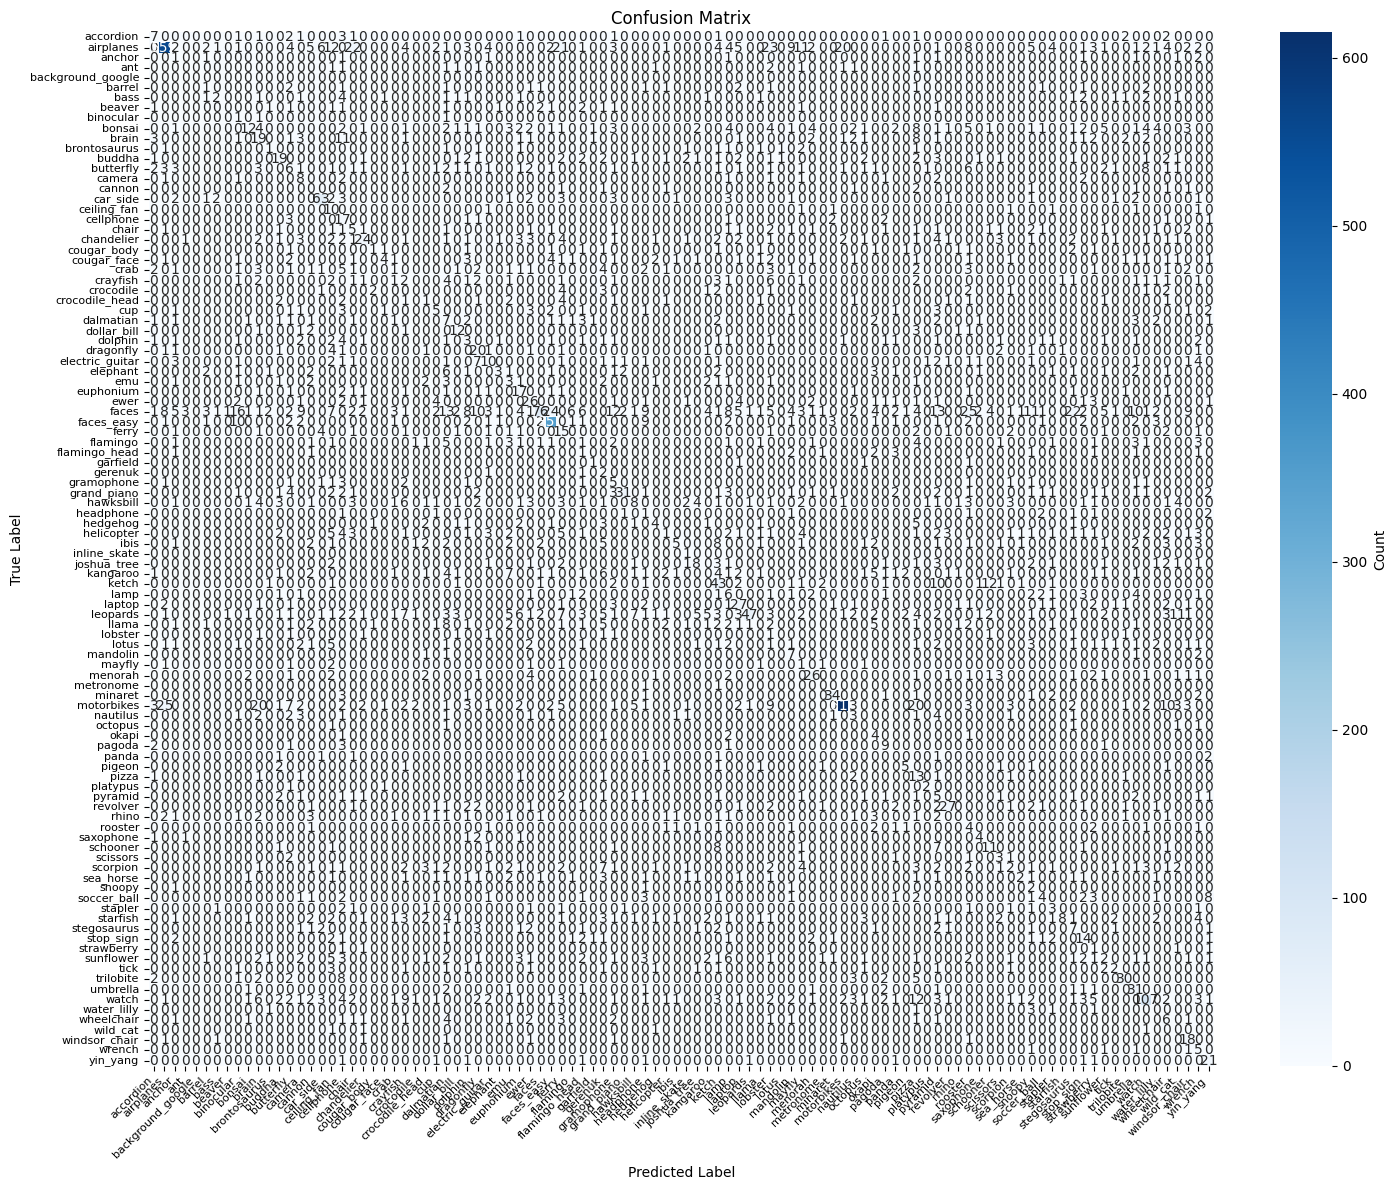

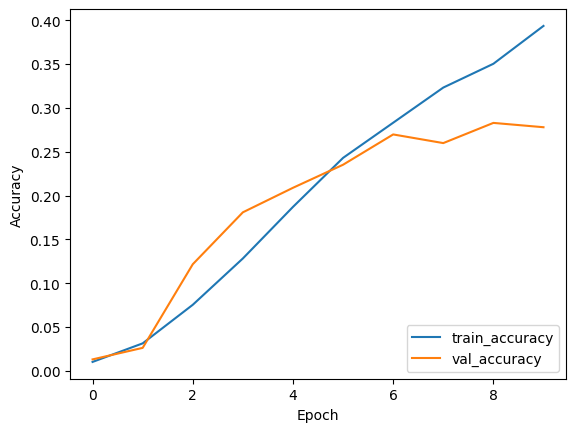

In [20]:

# model with slower learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()



Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 27s 148ms/step - accuracy: 0.0113 - loss: 6.3105

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.0113 - loss: 6.3017 - val_accuracy: 0.0033 - val_loss: 4.3932
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 155ms/step - accuracy: 0.0091 - loss: 4.6167 - val_accuracy: 0.0016 - val_loss: 4.4014
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - accuracy: 0.0123 - loss: 4.6161 - val_accuracy: 0.0016 - val_loss: 4.4046
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 168ms/step - accuracy: 0.0078 - loss: 4.6160 - val_accuracy: 0.0016 - val_loss: 4.4069
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.0137 - loss: 4.6117 - val_accuracy: 0.0016 - val_loss: 4.4060
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - accuracy: 0.0116 - loss: 4.6151 - val_accuracy: 0.0016 - val_loss: 4.4062
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 178ms/step - accuracy: 0.0134 - loss: 4.6147 - val_accuracy: 0.0033 - val_loss: 4.4062
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 138ms/step - accuracy: 0.0101 - loss: 4.6162 - val

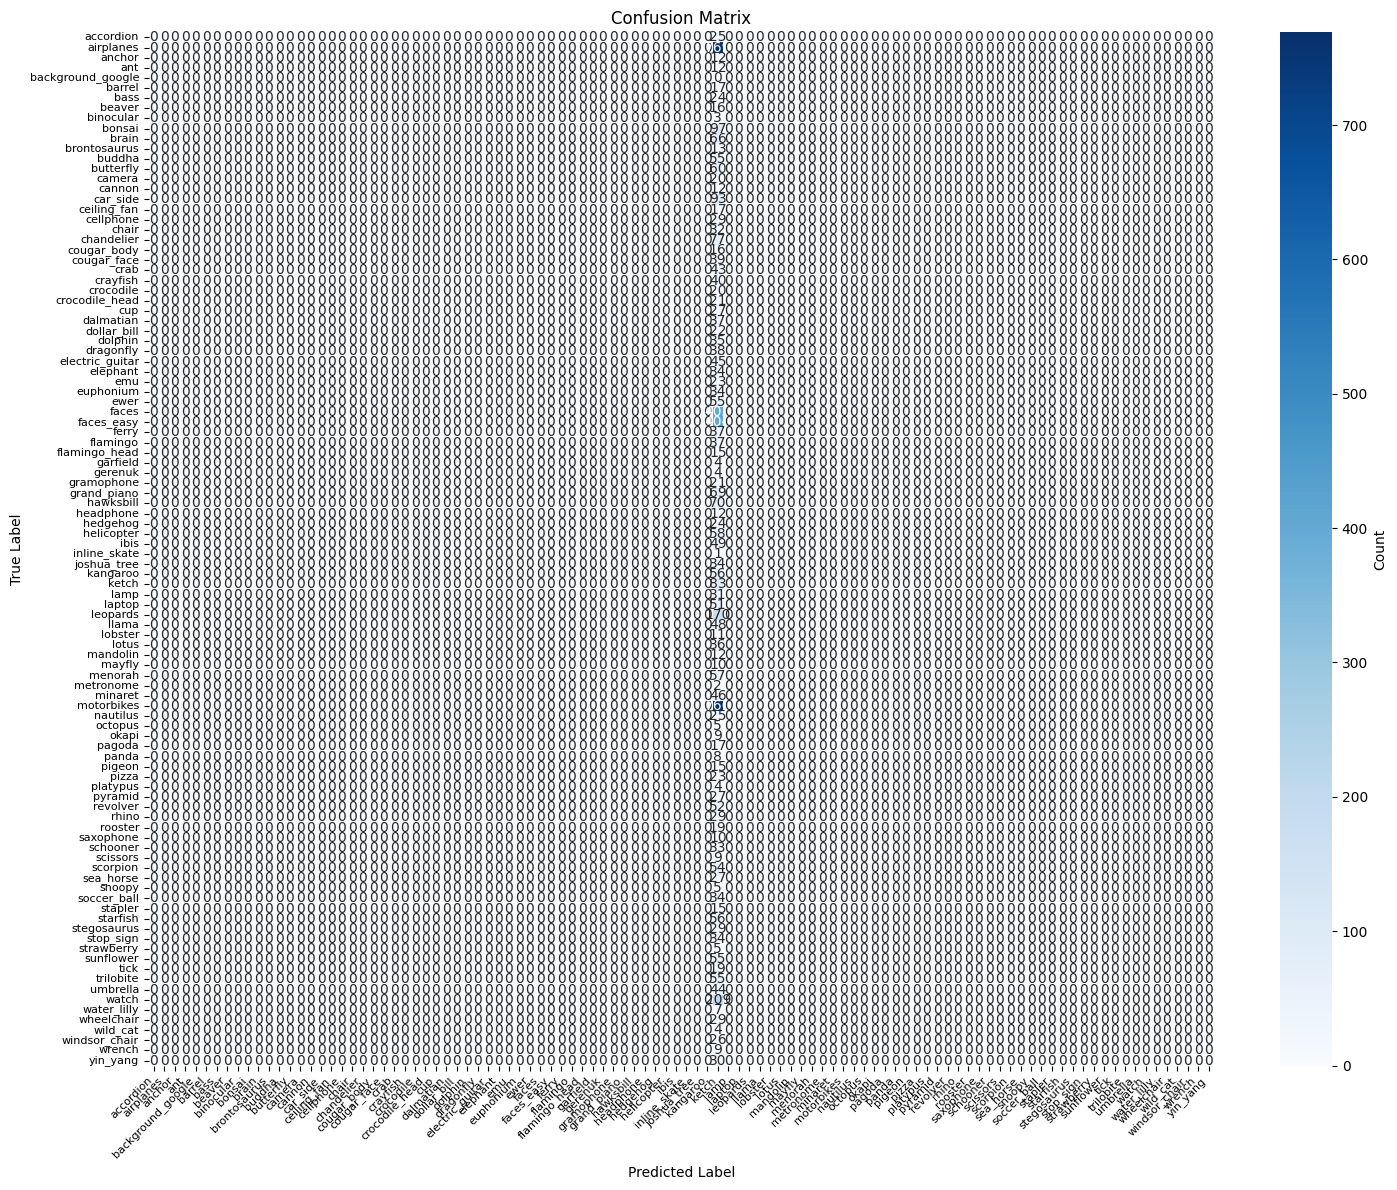

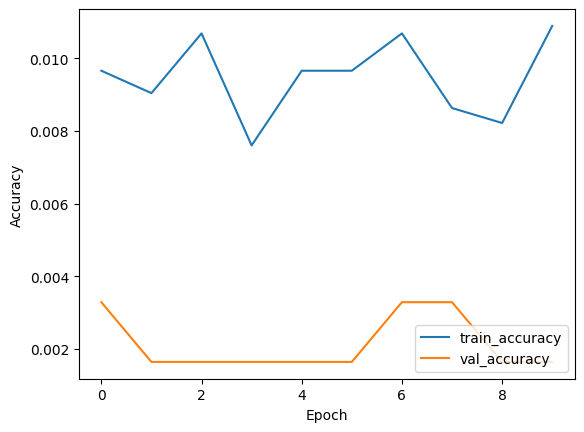

In [21]:

# model with faster learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 28s 157ms/step - accuracy: 0.0135 - loss: 4.6203

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 164ms/step - accuracy: 0.0135 - loss: 4.6199 - val_accuracy: 0.0609 - val_loss: 4.1807
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 170ms/step - accuracy: 0.0613 - loss: 4.2881 - val_accuracy: 0.1711 - val_loss: 3.5926
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 163ms/step - accuracy: 0.1527 - loss: 3.7984 - val_accuracy: 0.2401 - val_loss: 3.2434
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.2724 - loss: 3.2634 - val_accuracy: 0.2763 - val_loss: 3.1258
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 168ms/step - accuracy: 0.3637 - loss: 2.9270 - val_accuracy: 0.2944 - val_loss: 3.1207
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 168ms/step - accuracy: 0.4001 - loss: 2.6896 - val_accuracy: 0.2714 - val_loss: 3.1875
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - accuracy: 0.4465 - loss: 2.5279 - val_accuracy: 0.2763 - val_loss: 3.7120
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 26s 149ms/step - accuracy: 0.4638 - loss: 2.3996 - val

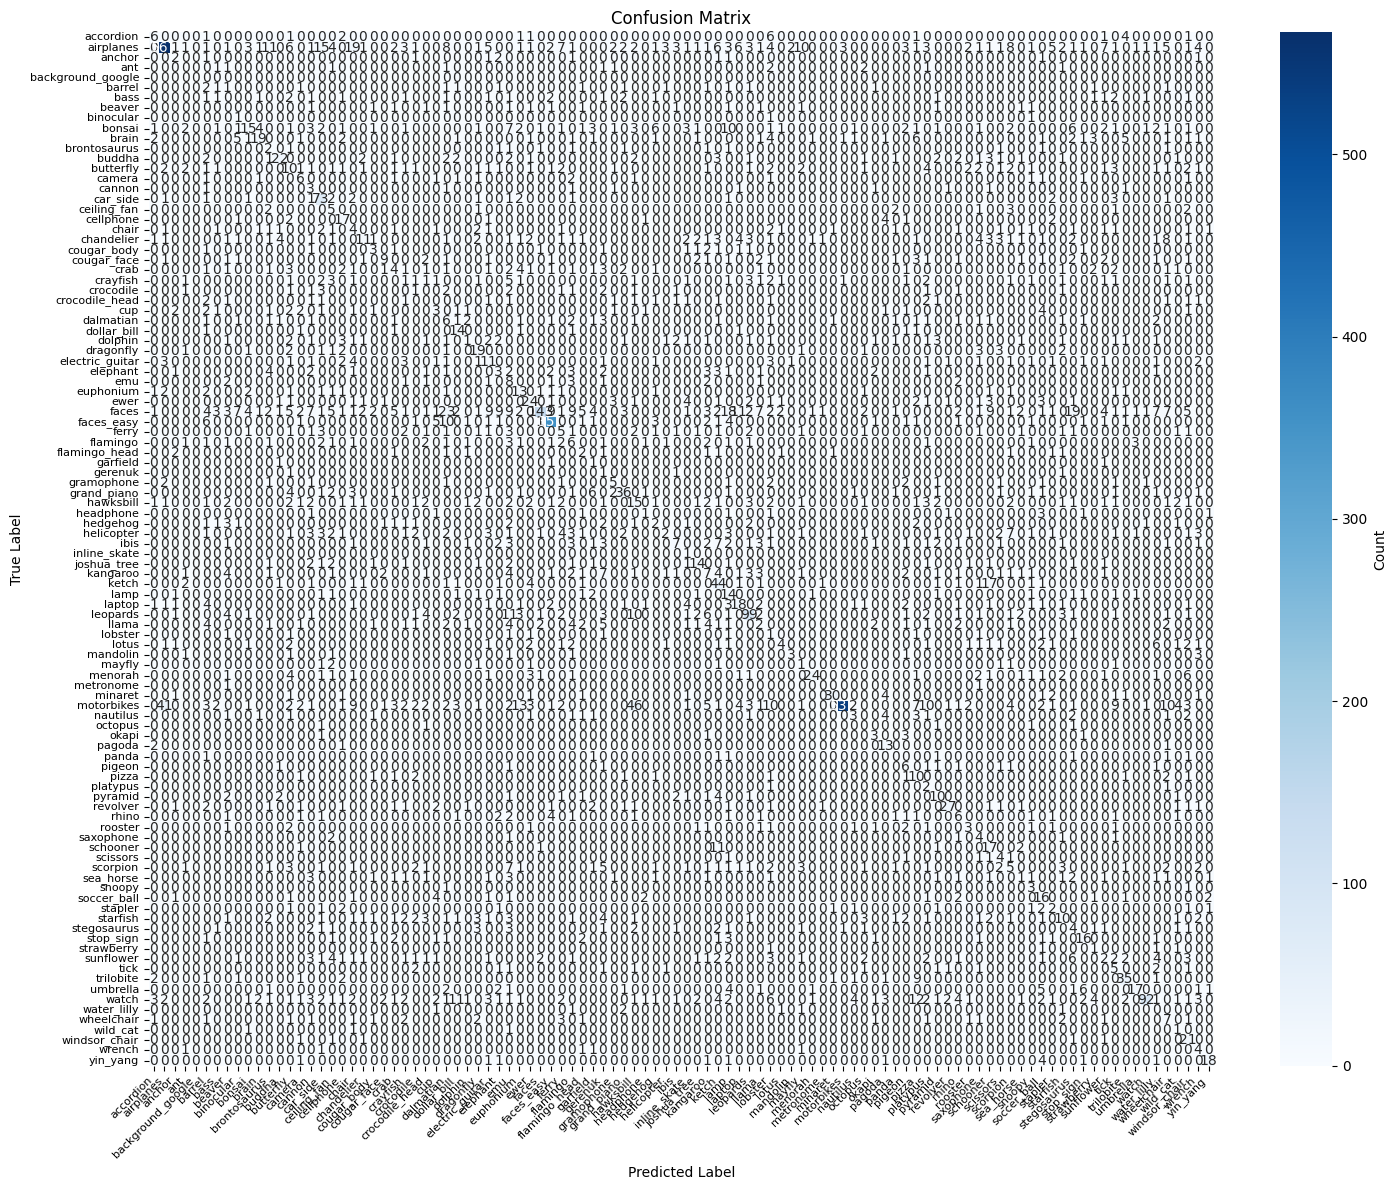

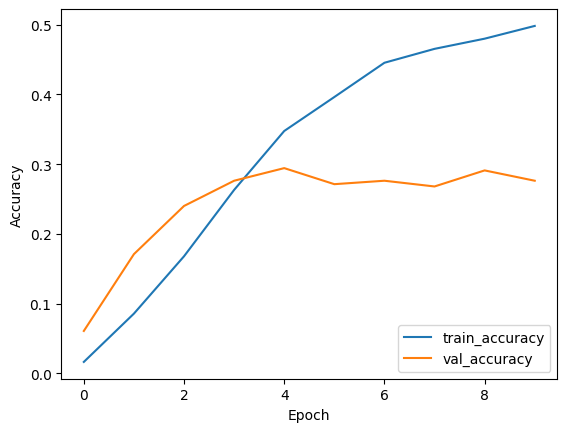

In [22]:

# model with dropout 0.2
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/30


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 28s 167ms/step - accuracy: 0.0121 - loss: 4.6279

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - accuracy: 0.0122 - loss: 4.6275 - val_accuracy: 0.0280 - val_loss: 4.2872
Epoch 2/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 163ms/step - accuracy: 0.0541 - loss: 4.3683 - val_accuracy: 0.1743 - val_loss: 3.5908
Epoch 3/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 26s 149ms/step - accuracy: 0.1532 - loss: 3.7694 - val_accuracy: 0.2434 - val_loss: 3.1680
Epoch 4/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 25s 147ms/step - accuracy: 0.2477 - loss: 3.3723 - val_accuracy: 0.2895 - val_loss: 2.9916
Epoch 5/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3398 - loss: 2.9861

2024-10-30 19:10:05.231629: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - accuracy: 0.3397 - loss: 2.9860 - val_accuracy: 0.3174 - val_loss: 3.0301
Epoch 6/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 162ms/step - accuracy: 0.3854 - loss: 2.7506 - val_accuracy: 0.2993 - val_loss: 3.1892
Epoch 7/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - accuracy: 0.4275 - loss: 2.5514 - val_accuracy: 0.3076 - val_loss: 3.3541
Epoch 8/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 162ms/step - accuracy: 0.4655 - loss: 2.3941 - val_accuracy: 0.2944 - val_loss: 3.5939
Epoch 9/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 26s 149ms/step - accuracy: 0.4828 - loss: 2.3505 - val_accuracy: 0.3289 - val_loss: 3.4947
Epoch 10/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 26s 151ms/step - accuracy: 0.4928 - loss: 2.2703 - val_accuracy: 0.3355 - val_loss: 3.6666
Epoch 11/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.4930 - loss: 2.2574 - val_accuracy: 0.3273 - val_loss: 3.6468
Epoch 12/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 163ms/step - accuracy: 0.5120 - loss: 2.2010 - 

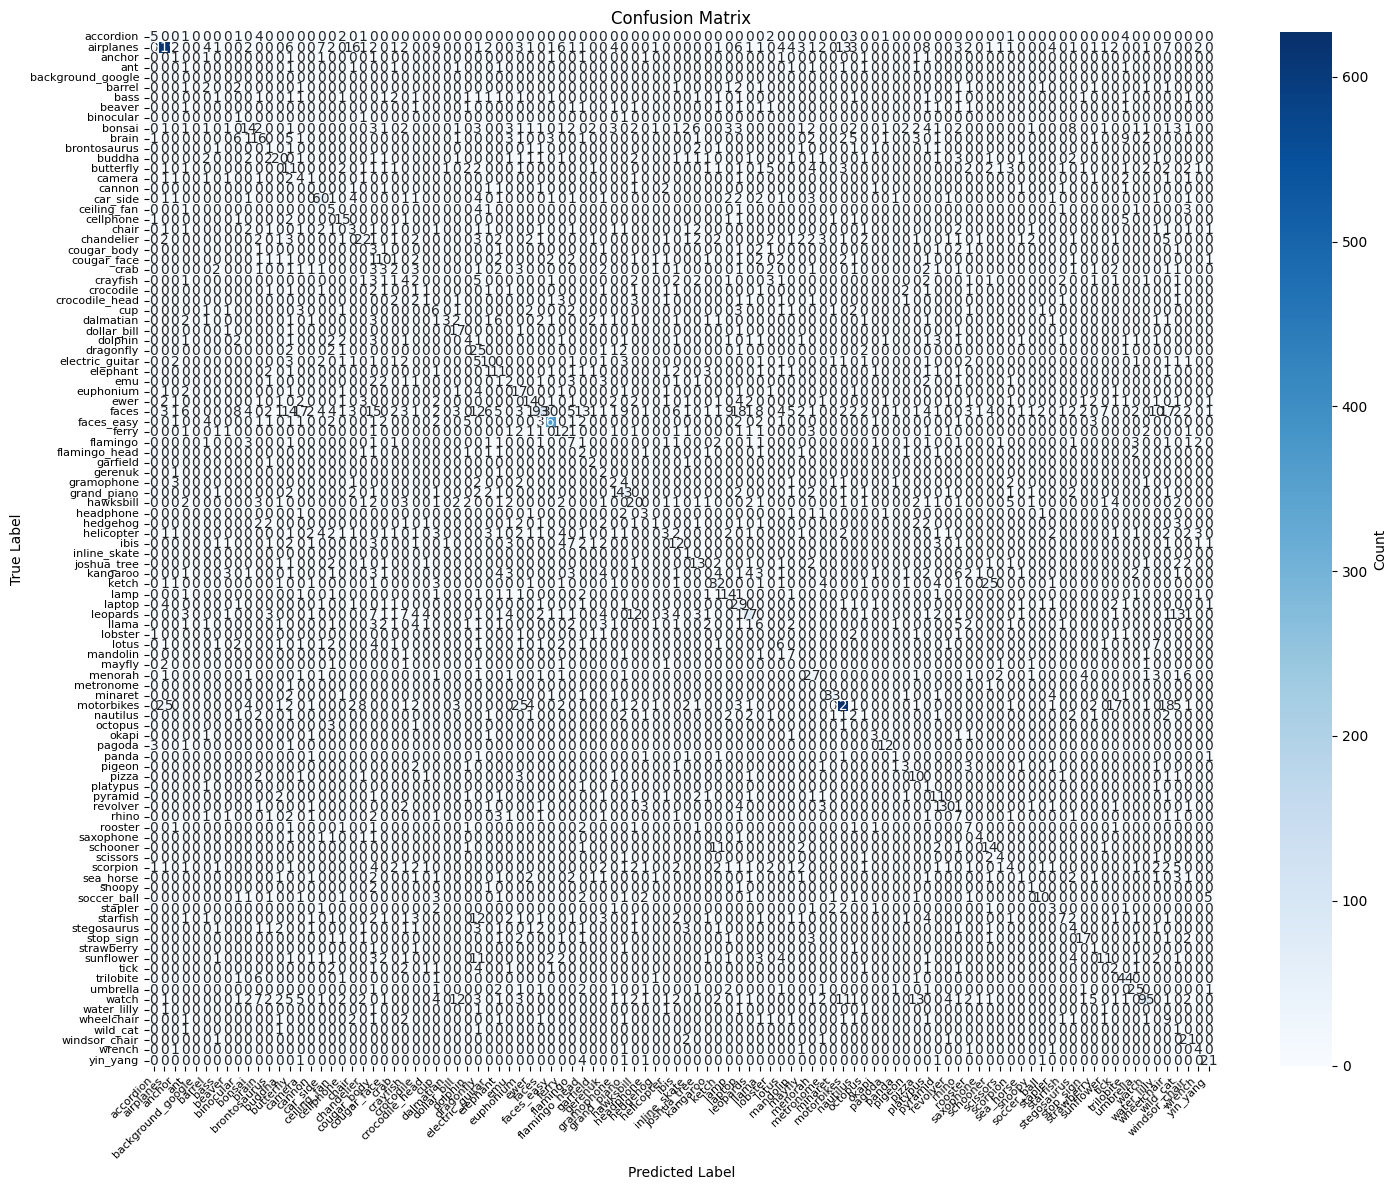

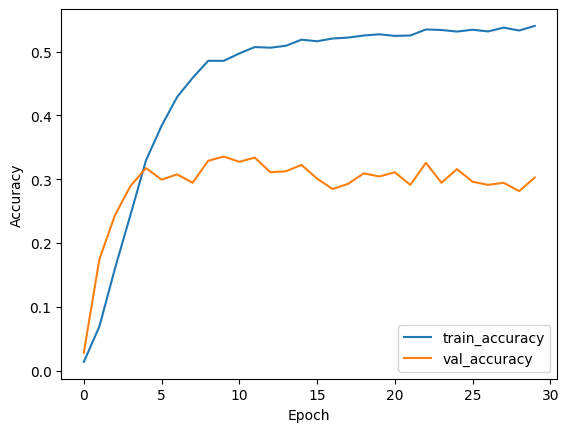

In [23]:

# model with dropout 0.2 + 30 epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=30, validation_data=val_data)

print_results()


Epoch 1/30


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - accuracy: 0.0064 - loss: 4.6582 - val_accuracy: 0.0214 - val_loss: 4.3762
Epoch 2/30


/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - accuracy: 0.0152 - loss: 4.6142 - val_accuracy: 0.0345 - val_loss: 4.2652
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.0319 - loss: 4.4250 - val_accuracy: 0.0411 - val_loss: 4.2057
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 210ms/step - accuracy: 0.0693 - loss: 4.3385 - val_accuracy: 0.0888 - val_loss: 3.8566
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.0989 - loss: 4.0943 - val_accuracy: 0.1645 - val_loss: 3.6530
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.1353 - loss: 3.8840 - val_accuracy: 0.1743 - val_loss: 3.4858
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.1941 - loss: 3.6854 - val_accuracy: 0.2319 - val_loss: 3.2474
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - accuracy: 0.2233 - loss: 3.5114 - val_accuracy: 0.2714 - val_loss: 3.1312
Epoch 9/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.2092 - loss: 3.4840 - val_accuracy: 0.3059 - 

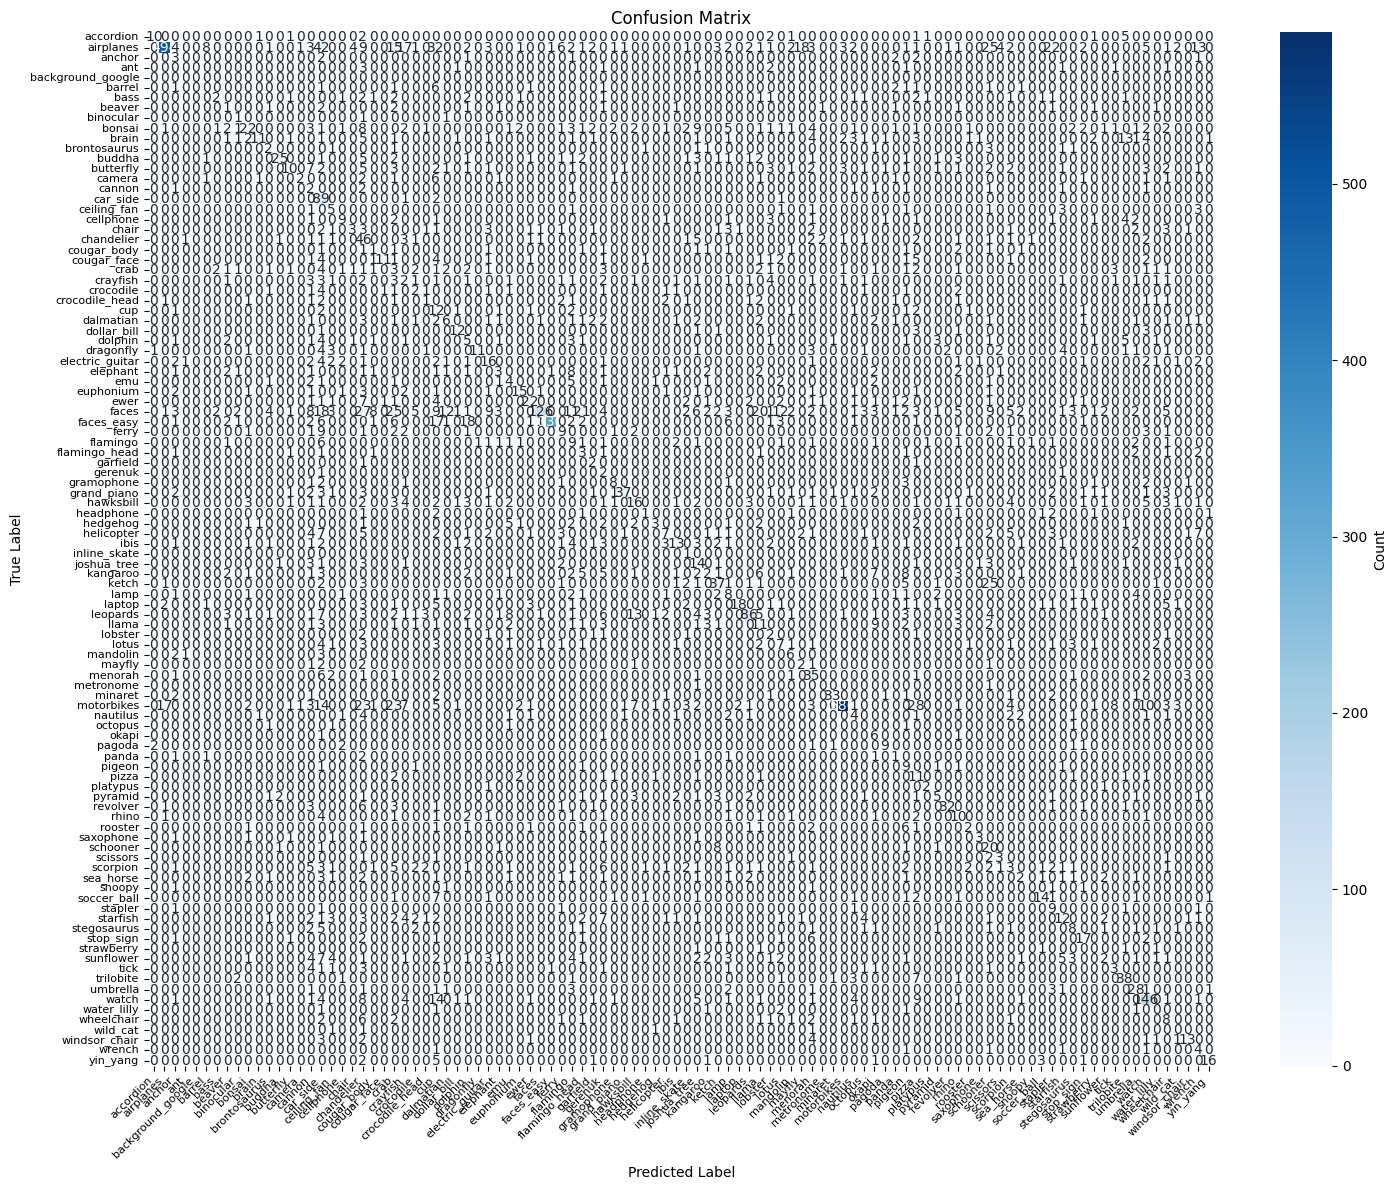

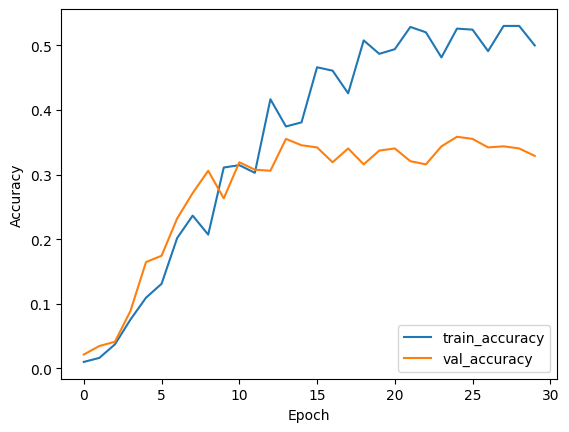

In [24]:
def create_model():
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(128, 128, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))   

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

model = create_model()
history = model.fit(train_data, steps_per_epoch=60, epochs=30, validation_data=val_data, validation_steps=20)

print_results()

In [25]:
# model with more layers with more units

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
    
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),        
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Increased dense layer size
        tf.keras.layers.Dropout(0.1),  # Higher dropout to regularize
        
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 58s 344ms/step - accuracy: 0.0090 - loss: 4.6276

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 59s 356ms/step - accuracy: 0.0090 - loss: 4.6274 - val_accuracy: 0.0115 - val_loss: 4.3824
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 59s 369ms/step - accuracy: 0.0148 - loss: 4.5788 - val_accuracy: 0.0263 - val_loss: 4.1756
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.0481 - loss: 4.2960

In [ ]:
# model with more dropout and more layers with more units

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),  # Increased dense layer size
        tf.keras.layers.Dropout(0.1),  # Higher dropout to regularize
        
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()

In [ ]:

# model with dropout 0.2 and pooling 3x3
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


In [ ]:

# model with dropout 0.2 and more epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


In [ ]:
# model with dropout 0.2 and pooling 3x3 and more epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Additional layer
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Increased dense layer size
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),  # Higher dropout to regularize

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

# Compile with a lower learning rate
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Reduced dense layer size
        tf.keras.layers.Dropout(0.1),  # Increased dropout rate
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Reduced dense layer size
        tf.keras.layers.Dropout(0.1),  # Increased dropout rate
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

In [ ]:
def create_improved_model():
    model = tf.keras.models.Sequential([
        # First Convolutional Block
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),  # Regularization

        # Second Convolutional Block
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        # Third Convolutional Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Fourth Convolutional Block for Deeper Feature Extraction
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Global Average Pooling instead of Flattening
        tf.keras.layers.GlobalAveragePooling2D(),

        # Fully Connected Layer
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout for Dense layer

        # Output Layer
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.9)

# Instantiate and compile the improved model
model = create_improved_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),  # Reduced learning rate for stability
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model
history = model.fit(train_data, epochs=20, validation_data=val_data)